In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    from text_recognizer.datasets import IamDataset
except ImportError:
    import sys
    sys.path.append('..')
    from text_recognizer.datasets import IamDataset
    
from text_recognizer.datasets import EmnistDataset
from text_recognizer import util

In [11]:
dataset = IamDataset()
dataset.load_or_generate_data()
print(dataset)

IAM Dataset
Num forms: 1539



In [3]:
emnist_dataset = EmnistDataset()
mapping = emnist_dataset.mapping
inverse_mapping = emnist_dataset.inverse_mapping

In [4]:
LINE_HEIGHT = 28
LINE_WIDTH = 952

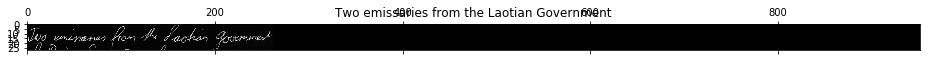

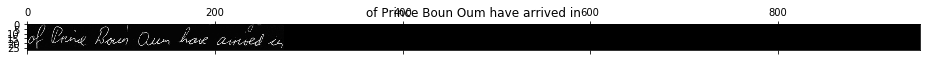

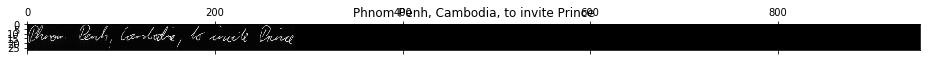

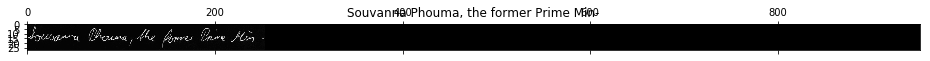

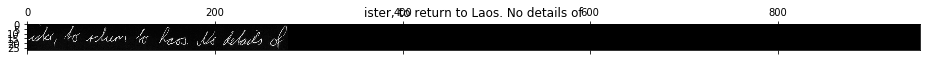

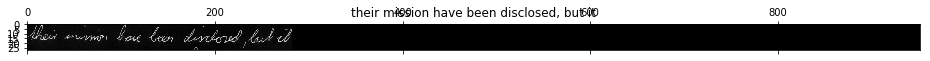

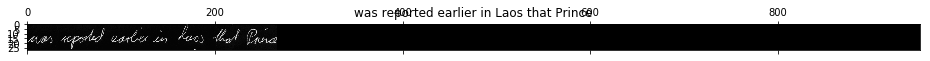

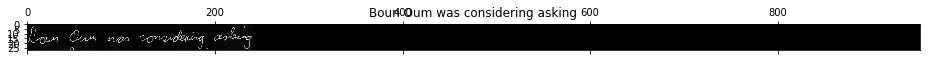

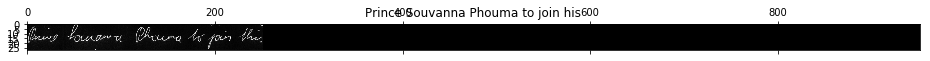

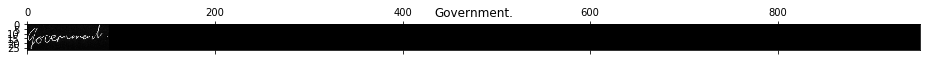

In [16]:
id_ = 'a03-014'

line_regions = dataset.line_regions_by_id[id_]
line_strings = dataset.line_strings_by_id[id_]
form_filename = dataset.form_filenames_by_id[id_]

image = util.read_image(form_filename, grayscale=True)

for line_region, line_string in zip(line_regions, line_strings):
    line_crop = image[line_region['y1']:line_region['y2'], line_region['x1']:line_region['x2']]

    crop_height, crop_width = line_crop.shape
    resized_width = int(crop_width * (LINE_HEIGHT / crop_height))
    line_crop_resized = cv2.resize(line_crop, dsize=(resized_width, LINE_HEIGHT), interpolation=cv2.INTER_CUBIC)
    line_crop_resized = 255 - line_crop_resized
    line_crop_padded = np.zeros((LINE_HEIGHT, LINE_WIDTH))
    line_crop_padded[:, :resized_width] = line_crop_resized

    plt.matshow(line_crop_padded, cmap='gray')
    plt.title(line_string)


In [ ]:
x = 'A MOVE to stop Mr. Gaitskell from________________________________________________________________'
len(x)

In [ ]:
string = "flower in a cultural desert. &quot;Now, me - I'm"
string.replace('&quot;', '"')

In [ ]:

" ".join([string for strings in dataset.line_strings_by_id.values() for string in strings])